In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_excel('Xiaomi Raw Data.xlsx')

In [3]:
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0


In [5]:
oe=OrdinalEncoder()

In [9]:
df['Day']=oe.fit_transform(df[['Day']])
df['Browser']=oe.fit_transform(df[['Browser']])

In [10]:
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,1.0,0.0,13,4,8.5,2668.0
1,2,2.0,0.0,15,5,16.9,3469.0
2,3,1.0,2.0,20,6,7.3,5215.0
3,4,1.0,0.0,42,6,30.1,10423.0
4,5,2.0,2.0,20,6,13.3,5404.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer            43200 non-null  int64  
 1   Day                 43200 non-null  float64
 2   Browser             43200 non-null  float64
 3   No. of Clicks       43200 non-null  int64  
 4   Pages Viewed        43200 non-null  int64  
 5   Time (min)          43200 non-null  float64
 6   Amount Spent (Rs.)  43200 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 2.3 MB


In [12]:
df.drop('Customer',axis=1,inplace=True)

In [16]:
X=df.drop('Amount Spent (Rs.)',axis=1)
y=df['Amount Spent (Rs.)']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Building a simple DL model

In [20]:
model=Sequential([
    Dense(50,activation='relu',input_shape=(X_train.shape[1], )),
    Dense(100,activation='relu'),
    Dense(1,activation='relu')])  

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                300       
                                                                 
 dense_2 (Dense)             (None, 100)               5100      
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,501
Trainable params: 5,501
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='Adam',loss='mse',metrics=['mse'])

In [23]:
history=model.fit(X_train,y_train,batch_size=500,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
61/61 [==============================] - 3s 6ms/step - loss: 56659748.0000 - mse: 56659748.0000 - val_loss: 56682184.0000 - val_mse: 56682184.0000
Epoch 2/10
61/61 [==============================] - 0s 3ms/step - loss: 56659748.0000 - mse: 56659748.0000 - val_loss: 56682184.0000 - val_mse: 56682184.0000
Epoch 3/10
61/61 [==============================] - 0s 5ms/step - loss: 56659744.0000 - mse: 56659744.0000 - val_loss: 56682184.0000 - val_mse: 56682184.0000
Epoch 4/10
61/61 [==============================] - 0s 5ms/step - loss: 56659740.0000 - mse: 56659740.0000 - val_loss: 56682184.0000 - val_mse: 56682184.0000
Epoch 5/10
61/61 [==============================] - 0s 5ms/step - loss: 56659744.0000 - mse: 56659744.0000 - val_loss: 56682184.0000 - val_mse: 56682184.0000
Epoch 6/10
61/61 [==============================] - 0s 3ms/step - loss: 56659748.0000 - mse: 56659748.0000 - val_loss: 56682184.0000 - val_mse: 56682184.0000
Epoch 7/10
61/61 [==============================] - 

### Accuracy plot

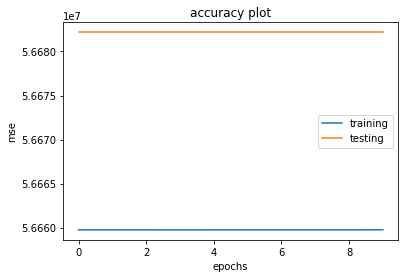

In [25]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('epochs')
plt.ylabel('mse')
plt.title('accuracy plot')
plt.legend(['training','testing'])

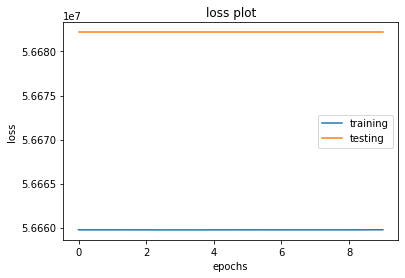

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss plot')
plt.legend(['training','testing'])